In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
N = 1000

X = np.linspace(0,2,N)
Y = np.cos(X)
delta = X[1] - X[0]

In [3]:
delta*sum(Y), np.sin(2)

(0.9098815607204649, 0.9092974268256817)

---

# Errors 

In [111]:
error_rectangle = []
for N in range(10,1000,20):

    X = np.linspace(0,2,N)
    Y = np.cos(X)
    delta = X[1] - X[0]
    error_rectangle.append(delta*sum(Y) - np.sin(2))

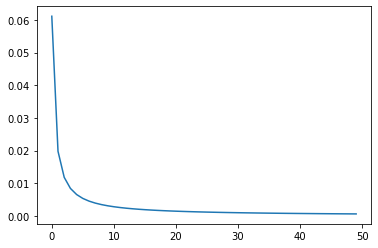

In [112]:
plt.plot(error_rectangle);

---

# Trapeze


[explanation on wiki](https://en.wikipedia.org/wiki/Trapezoidal_rule)

In [90]:

N = 100

X = np.linspace(0,2,N)
weights = 2*np.ones_like(X)
weights[0] = weights[-1] =  1
Y = np.cos(X)
delta = X[1] - X[0]
delta*weights @ Y /2

0.9092665012870648

In [99]:
N = 100

X = np.linspace(0,2,N)
Y = np.cos(X)

delta = X[1] - X[0]
delta* (Y[0] + Y[-1] +  2*sum(Y[1:-1]))/2

0.9092665012870642

In [113]:
error_trapeze = []
for N in range(10,1000,20):

    X = np.linspace(0,2,N)
    Y = np.cos(X)
    delta = X[1] - X[0]
    error_trapeze.append(delta* (Y[0] + Y[-1] +  2*sum(Y[1:-1]))/2 - np.sin(2))

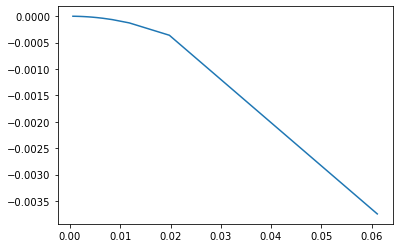

In [116]:
plt.plot(error_rectangle, error_trapeze);

---

# Simpson

[details](https://math24.net/simpsons-rule.html)

[explanation on wiki](https://en.wikipedia.org/wiki/Simpson%27s_rule)

In [4]:
N = 1000

X = np.linspace(0,2,N)
weights = 2*np.ones_like(X)
weights[1::2] = 4
weights[0] = weights[-1] =  1
Y = np.cos(X)
delta = X[1] - X[0]
delta*(weights @ Y) / 3

0.909574528346356

In [57]:
weights

array([1., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4.,
       2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4.,
       2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 1.])

# Alternative Simpson code 

In [5]:
N = 10000

X = np.linspace(0,2,N)
Y = np.cos(X)

delta = X[1] - X[0]
delta* (Y[0] + Y[-1] + 4*sum(Y[1::2]) + 2*sum(Y[2:-2:2]))/3

0.9092696506115666

In [9]:
N = 1000

X = np.linspace(0,2,N)

Y = np.cos(X)
delta = X[1] - X[0]
delta*(Y[0] + Y[-1] + 3*(sum(Y[1:-1:3]) +  sum(Y[2:-1:3]) )+ 2*sum(Y[3:-1:3]) )*3/8

0.9092974268258645

---

# Monte carlo

In [65]:
a, b  = 0, 2
N = 10000

X = (b-a)*np.random.rand(N) + a

(b-a)/N*sum(np.cos(X))


0.9191925906426741

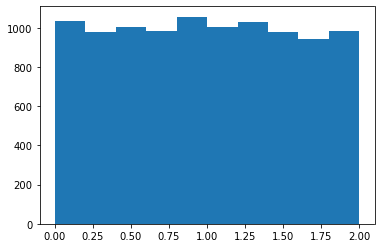

In [58]:
X = (b-a)*np.random.rand(N) + a

plt.hist(X);

# making random numbers with the Golden ratio

https://www.sciencedirect.com/science/article/pii/S0895717707002890

In [141]:
u = (1 + np.sqrt(5))/2

V = [1]
for k in range(10000):
    x = V[-1] + u
    V.append(x - int(x) )
V = np.array(V)

In [142]:
a, b  = 0, 2
N = len(V)
X = (b-a)*V + a
(b-a)/N*sum(np.cos(X))


0.9092643878390259

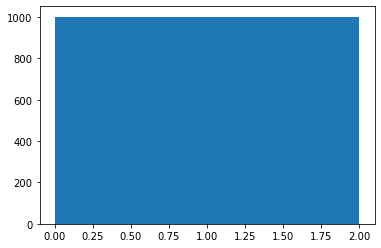

In [144]:
plt.hist(X);